In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [150]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Changing the columns name

In [151]:
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
           'body-style','drive-wheels','engine-location','wheel-base','lenght','width','height',
           'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
           'bore','stroke','compression-ratio','horsepower','peak-rps','city-mpg','highway-mpg','price']

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rps,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Data types

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  lenght             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Sum of NaN for each column

In [153]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
lenght               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rps             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

How many "?" for each column -> this should be interpretated as NaN

In [154]:
from collections import Counter
count = 0
column = []
for col in df.columns:
    for line in df[col]:
        if line == '?':
            column.append(col)
            count +=1   
print('Numero de "?" em cada coluna')
print(Counter(column))

Numero de "?" em cada coluna
Counter({'normalized-losses': 41, 'bore': 4, 'stroke': 4, 'price': 4, 'num-of-doors': 2, 'horsepower': 2, 'peak-rps': 2})


In [155]:
df = df.replace('?',np.NaN)

In [156]:
df.dropna(subset=['price'], axis=0, inplace=True)

In [157]:
df.price = df.price.astype(float)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  lenght             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Lindando com valores vazios

In [159]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)

In [160]:
df['stroke'] = df['stroke'].astype(float)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)

In [161]:
df['bore'] = df['bore'].astype(float)
df['bore'].fillna(df['bore'].mean(), inplace=True)

In [162]:
df['peak-rps'] = df['peak-rps'].astype(float)
df['peak-rps'].fillna(df['peak-rps'].mean(), inplace=True)

In [163]:
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [164]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [165]:
df['num-of-doors'].fillna('four', inplace=True)

Descrição estatística

In [166]:
numeric_columns = df.describe().columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00000,2.00,3.00
normalized-losses,201.0,122.000000,31.996250,65.00,101.00,122.00000,137.00,256.00
wheel-base,201.0,98.797015,6.066366,86.60,94.50,97.00000,102.40,120.90
lenght,201.0,174.200995,12.322175,141.10,166.80,173.20000,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50000,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10000,55.50,59.80
curb-weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00000,2926.00,4066.00
engine-size,201.0,126.875622,41.546834,61.00,98.00,120.00000,141.00,326.00
bore,201.0,3.330711,0.268072,2.54,3.15,3.31000,3.58,3.94
stroke,201.0,3.256904,0.316048,2.07,3.11,3.29000,3.41,4.17


In [167]:
numeric_columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'lenght', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rps', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [168]:
df['lenght'] = df['lenght']/df['lenght'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [169]:
df[['lenght','width','height']]

,lenght,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
200,0.907256,0.956944,0.928094
201,0.907256,0.955556,0.928094
202,0.907256,0.956944,0.928094
203,0.907256,0.956944,0.928094


Text(0.5, 1.0, 'horsepower bins')

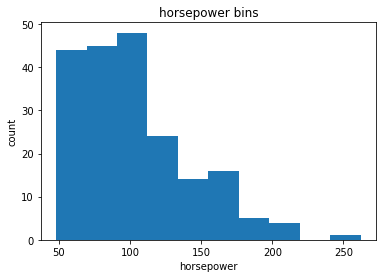

In [170]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [171]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [172]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [173]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

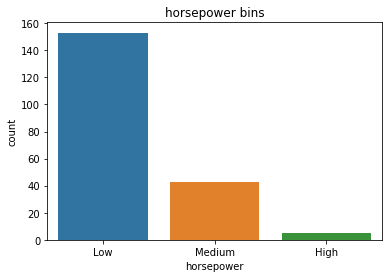

In [174]:
sns.countplot(x="horsepower-binned", data=df)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [175]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [176]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [177]:
df = pd.concat([df,dummy_variable_1,dummy_variable_2], axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rps,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [178]:
df.to_csv('clean_df.csv')

In [179]:
cat_columns = []
for col in df.columns:
    if col not in numeric_columns:
        cat_columns.append(col)
cat_columns

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'horsepower-binned',
 'fuel-type-diesel',
 'fuel-type-gas',
 'aspiration-std',
 'aspiration-turbo']

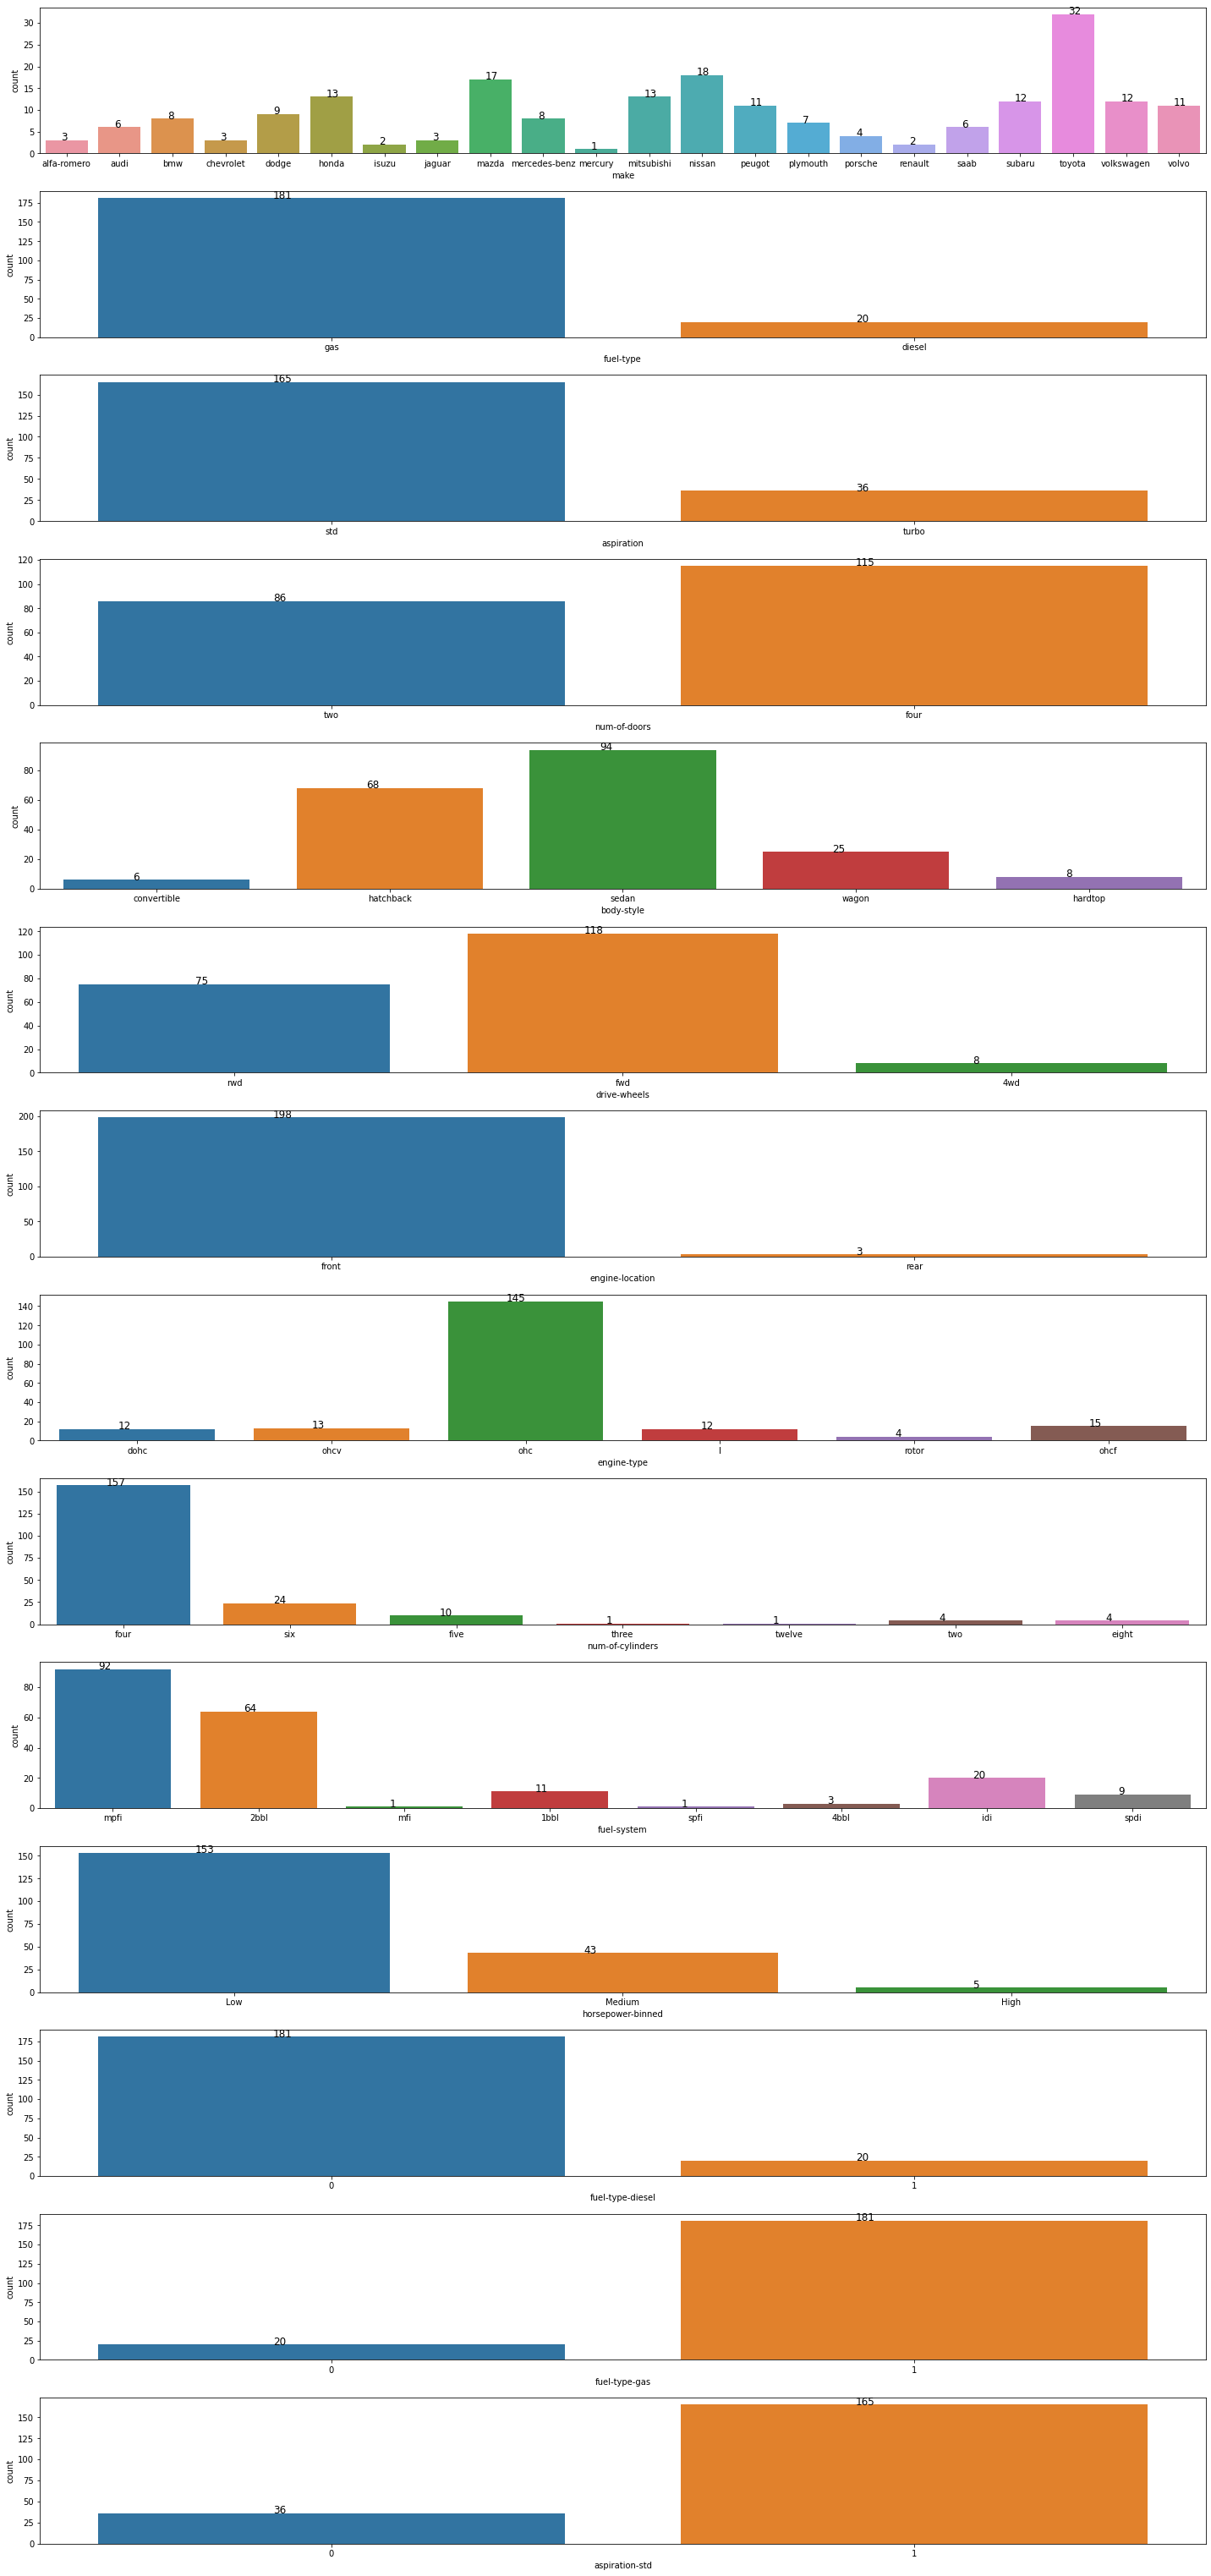

In [186]:
plt.figure(figsize=(20,45))
                                    
for n_col, i in zip(cat_columns, range(1,len(cat_columns))):
    plt.subplot(len(cat_columns),1,i)
    ax = sns.countplot(x=df[n_col])
    plt.tight_layout()
    
    for p in ax.patches:
        plt.annotate(p.get_height(), xy=(p.get_x()+0.3, p.get_height()), fontsize=12)

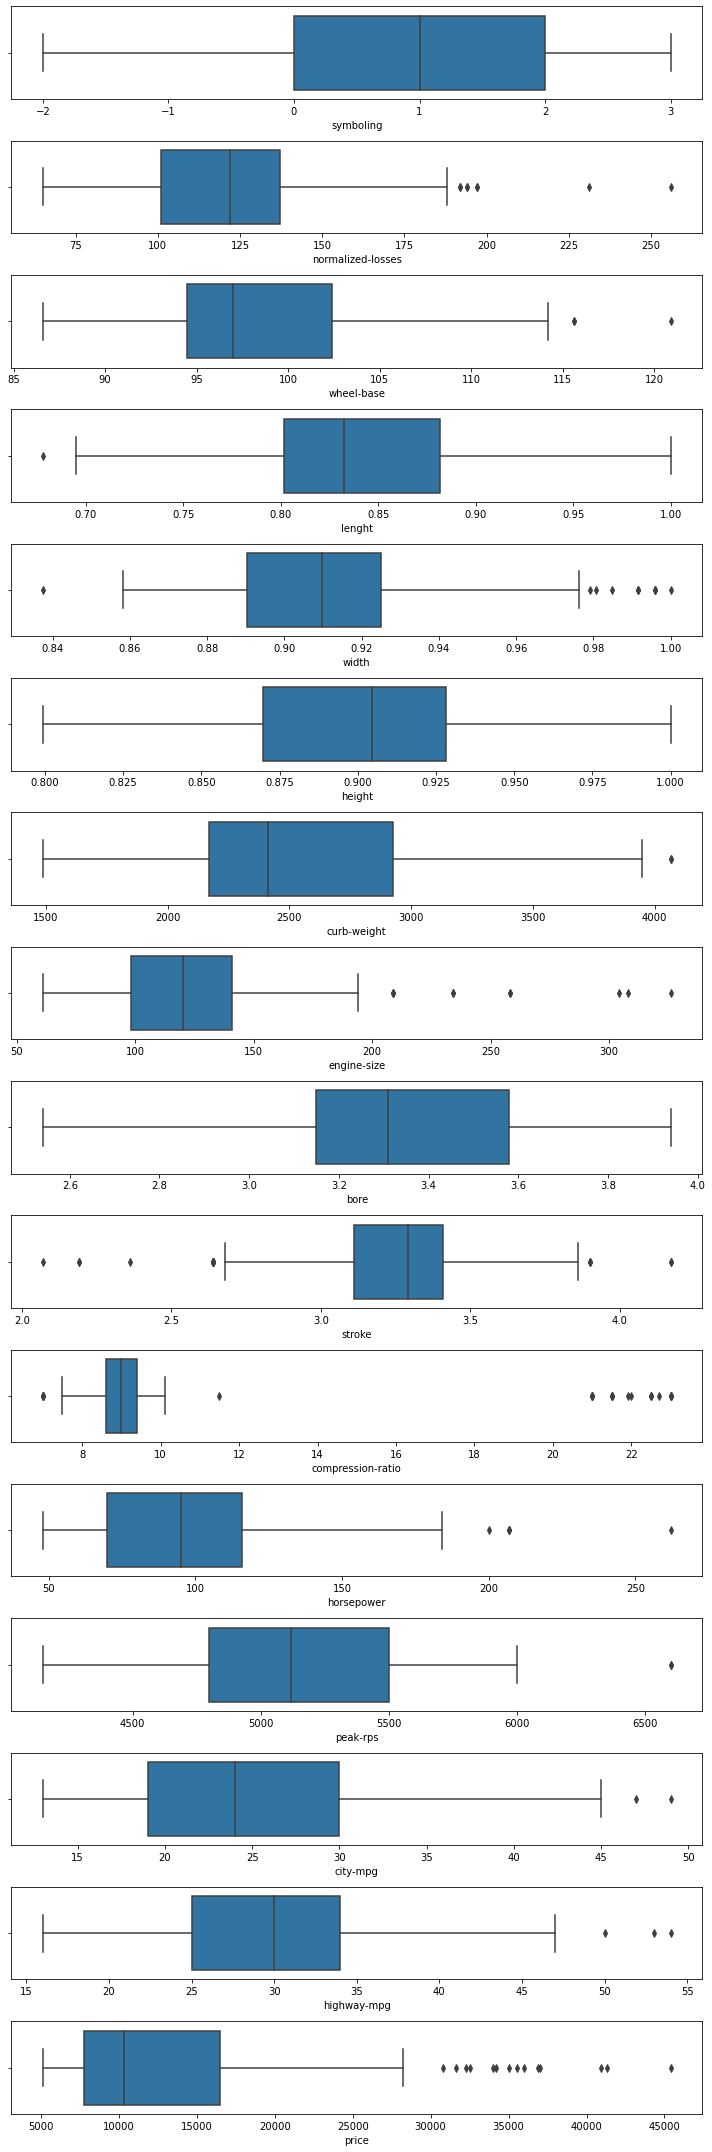

In [181]:
plt.figure(figsize=(10,30))
for n_col, i in zip(numeric_columns, range(1,len(numeric_columns)+1)):
    plt.subplot(len(numeric_columns),1,i)
    sns.boxplot(x=n_col, data=df)
    plt.tight_layout()

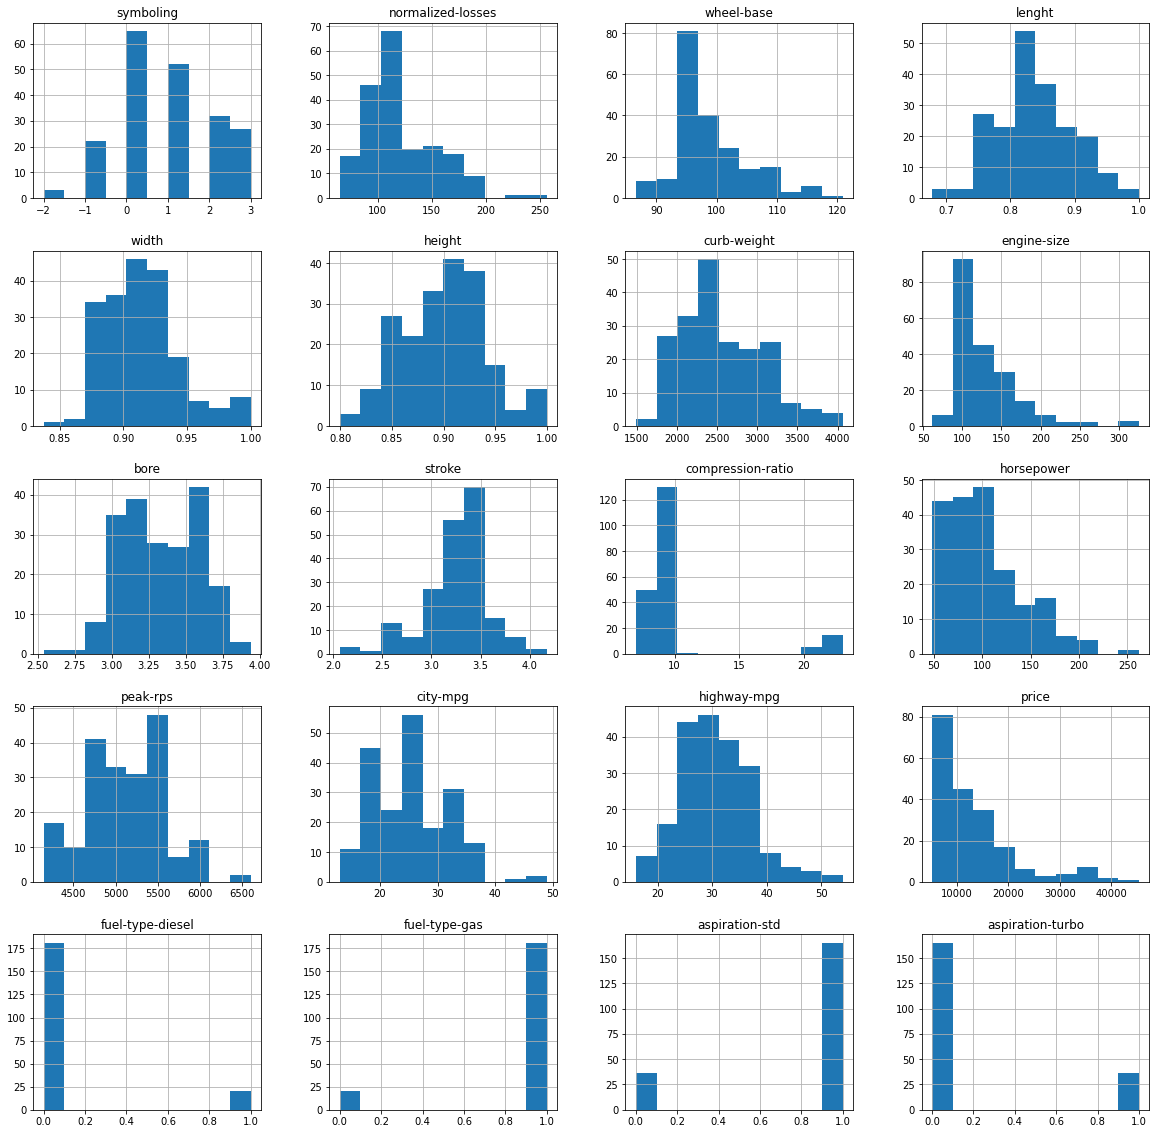

In [182]:
df.hist(figsize=(20,20));

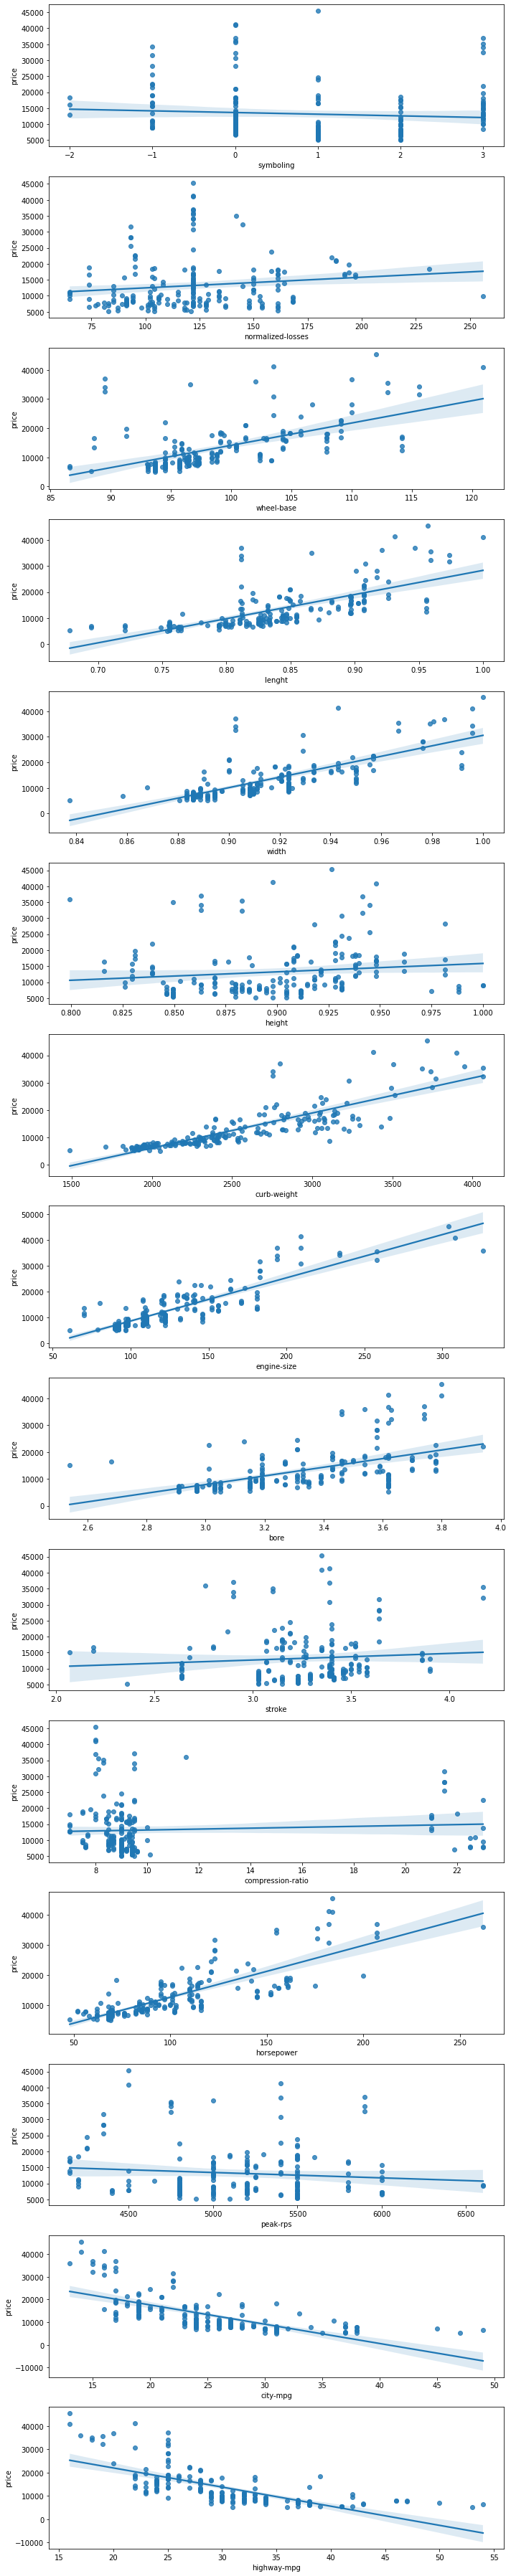

In [192]:
plt.figure(figsize=(10,50))
for n_col, i in zip(numeric_columns.drop('price'), range(1,len(numeric_columns.drop('price'))+1)):
    plt.subplot(len(numeric_columns.drop('price')),1,i)
    sns.regplot(x=n_col,y='price', data=df)
    plt.tight_layout()

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

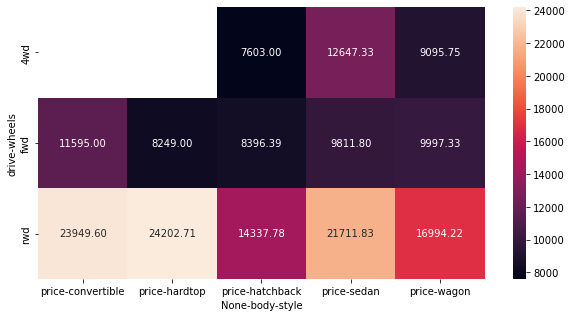

In [203]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')

plt.figure(figsize=(10,5))
sns.heatmap(df_pivot, annot=True, fmt='.2f')

<AxesSubplot:>

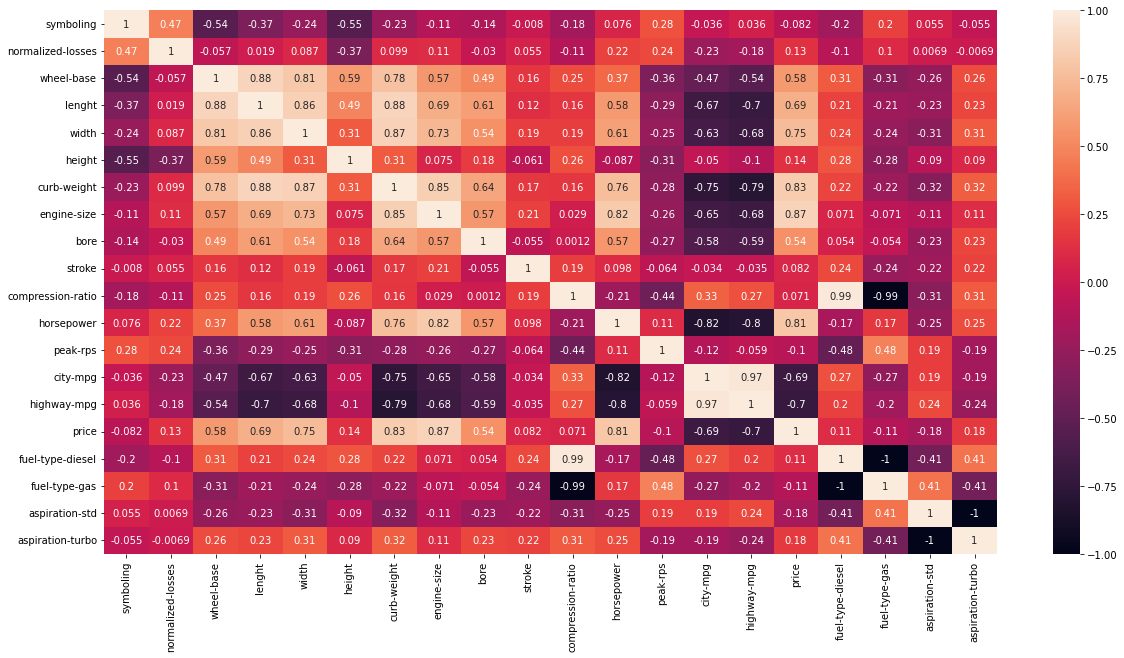

In [209]:
correlation = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

In [210]:
df.shape

(201, 31)